In [1]:
import gdown
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
# Menyimpan ulasan dalam file CSV
import csv

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv
import requests
from io import StringIO
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
from PIL import Image


from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Link unduhan Google Drive
url = 'https://drive.google.com/uc?id=1CEScZ_5ZvhWoO950AN1RpmtzTfl45LAg'

# Mengunduh file dan menyimpannya dengan nama yang diinginkan
output = 'ulasan_pinterest.csv'
gdown.download(url, output, quiet=False)

# Memuat file CSV ke pandas
scrapreview = pd.read_csv(output)

# Menampilkan beberapa baris pertama dari data
print(scrapreview.head())

Downloading...
From: https://drive.google.com/uc?id=1CEScZ_5ZvhWoO950AN1RpmtzTfl45LAg
To: /content/ulasan_pinterest.csv
100%|██████████| 2.87M/2.87M [00:00<00:00, 42.9MB/s]

                                              Review
0  pinterest adalah tempat sempurna untuk mencari...
1  first of all i want to say that this app actua...
2  kekurangan nya yaitu kalo mau nyimpan gambarvi...
3  halo pinterest ini pendapat aku tentang aplika...
4  semua visual gambar yang saya cari selalu ada ...


In [3]:
pinterest_df = pd.DataFrame(scrapreview)
pinterest_df.shape
pinterest_df.head()

# Membuat DataFrame dari hasil scrapreview
pinterest_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = pinterest_df.shape

In [4]:
pinterest_df.head()

,Review
0,pinterest adalah tempat sempurna untuk mencari...
1,first of all i want to say that this app actua...
2,kekurangan nya yaitu kalo mau nyimpan gambarvi...
3,halo pinterest ini pendapat aku tentang aplika...
4,semua visual gambar yang saya cari selalu ada ...


In [5]:
pinterest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


pinterest_df.drop(columns=['replyContent', 'repliedAt'], inplace=True)
pinterest_df.dropna(inplace=True)

In [6]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = pinterest_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
pinterest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update([
    'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa',
    'loh', 'kah', 'woi', 'woii', 'woy', 'kok', 'dong', 'nih', 'deh', 'tuh',
    'kan', 'lah', 'eh', 'oh', 'si', 'gue', 'elo', 'loe', 'bro', 'sis', 'bang',
    'cuy', 'yuk', 'nih', 'makasih', 'thanks', 'oke', 'ok', 'dapet', 'gitu',
    'anjay', 'anjir', 'santai', 'wkwk', 'hehe', 'hmm', 'hadeh', 'btw', 'bentar',
    'abis', 'malah', 'padahal', 'emang', 'kayak', 'serius', 'gimana', 'kenapa',
    'soalnya', 'daripada', 'gapapa', 'mending', 'udah', 'baru', 'pasti', 'tau',
    'katanya', 'pastinya', 'masalahnya', 'tapi', 'walaupun', 'biarpun', 'meskipun',
    'coba', 'tadi', 'barusan', 'sama', 'bukan', 'udah', 'tetep', 'kalo', 'kalau',
    'sampe', 'sampek', 'ampe', 'maaf', 'sorry', 'bodo', 'bgt', 'wkwkwk', 'haha',
    'huhu', 'huft', 'cm', 'cuman', 'doang', 'sumpah', 'parah', 'astaga', 'anjirr'
])

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


# Fungsi ekstraksi fitur BoW
def extract_features(texts):
    vectorizer = CountVectorizer()  # Membuat objek CountVectorizer untuk ekstraksi fitur
    features = vectorizer.fit_transform(texts)  # Mengubah teks menjadi representasi BoW
    return features, vectorizer.get_feature_names_out()


def filter_repeated_characters(text):
    # Menyaring kata-kata dengan pengulangan karakter yang tidak relevan
    # Join the list of words into a string before applying regex
    text = ' '.join(text)  # Convert list of words to a string
    text = re.sub(r'(.)\1+', r'\1', text)  # Menghapus pengulangan karakter
    return text.split()  # Split the string back into a list of words


In [9]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual",
    "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "cpt": "cepat",
    "tdk": "tidak", "tp": "tapi", "krn": "karena", "jg": "juga", "dgn": "dengan",
    "dmn": "dimana", "blm": "belum", "udh": "sudah", "gpp": "tidak apa-apa",
    "sm": "sama", "sy": "saya", "gw": "saya", "loe": "kamu", "td": "tadi",
    "dl": "dulu", "lg": "lagi", "btw": "ngomong-ngomong", "ntr": "nanti",
    "skrg": "sekarang", "trm": "terima", "brb": "sebentar", "afk": "tidak aktif",
    "idk": "saya tidak tahu", "omg": "astaga", "wkwk": "haha", "hehe": "haha",
    "hmm": "hmmm", "ok": "oke", "okeh": "oke", "plis": "tolong", "thx": "terima kasih",
    "makasi": "terima kasih", "makasih": "terima kasih", "thn": "tahun",
    "bln": "bulan", "hr": "hari", "dpt": "dapat", "kyk": "seperti",
    "msh": "masih", "gmna": "gimana", "gmn": "gimana", "smw": "semua",
    "pdhl": "padahal", "emg": "memang", "tdk": "tidak", "kl": "kalau",
    "klw": "kalau", "g": "tidak", "ga": "tidak", "gak": "tidak",
    "aj": "saja", "aja": "saja", "nih": "ini", "tuh": "itu", "dr": "dari",
    "tp": "tapi", "jd": "jadi", "jg": "juga", "bro": "saudara", "sis": "saudari"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [10]:
# Proses pembersihan dan pemrosesan teks
# Use 'Review' column instead of 'content'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)  # Pembersihan teks
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)  # Casefolding
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)  # Perbaikan slang words

# Tokenisasi
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
print(clean_df['text_tokenizingText'].head())  # Tampilkan beberapa hasil tokenisasi

# Penghapusan stopwords
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
print(clean_df['text_stopword'].head())  # Tampilkan hasil setelah filtering stopwords

# Penyaringan pengulangan karakter
clean_df['text_clean_filtered'] = clean_df['text_stopword'].apply(filter_repeated_characters)

# Penyusunan kembali kalimat
clean_df['text_akhir'] = clean_df['text_clean_filtered'].apply(toSentence)

# Ekstraksi Fitur - Bag of Words (BoW)
features, feature_names = extract_features(clean_df['text_akhir'])

# Menampilkan hasil ekstraksi fitur
print("Feature Names (Words):", feature_names)
print("Feature Matrix (BoW):")
print(features.toarray())

0    [pinterest, adalah, tempat, sempurna, untuk, m...
1    [first, of, all, i, want, to, say, that, this,...
2    [kekurangan, nya, yaitu, kalo, mau, nyimpan, g...
3    [halo, pinterest, ini, pendapat, aku, tentang,...
4    [semua, visual, gambar, yang, saya, cari, sela...
Name: text_tokenizingText, dtype: object
0    [pinterest, sempurna, mencari, inspirasi, fash...
1    [first, want, say, app, actually, good, lengka...
2    [kekurangan, nyimpan, gambarvideo, papan, nyam...
3    [halo, pinterest, pendapat, aplikasi, aplikasi...
4    [visual, gambar, cari, kualitas, gambarnya, ba...
Name: text_stopword, dtype: object
Feature Names (Words): ['abad' 'abadi' 'abaikan' ... '𝚢𝚊𝚗𝚐' '𝚢𝚐' '𝚢𝚗𝚐']
Feature Matrix (BoW):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

    # Menambahkan kata-kata positif khusus ulasan aplikasi
    positive_words = {
        'bagus': 10,  # Nilai lebih tinggi karena sangat positif
        'bagu': 10,    # Alternatif ejaan
        'baik': 10,
        'kereen': 3,
        'keren': 5,
        'mantap': 5,
        'memuaskan': 2,
        'recommended': 2,
        'suka': 1,
        'senang': 1,
        'puas': 2,
        'menarik': 1,
        'wow': 2,
        'top': 2,
        'sempurna': 3,
        'favorit': 2,
        'asik': 1,
        'asyik': 1,
        'oke': 1,
        'ok': 1,
        'cakep': 1,
        'kece': 1,
        'helpful': 1,
        'berguna': 2,
        'fun': 1,
        'seru': 1,
        'wuenak': 1  # Slang untuk "enak"
    }

    for word, score in positive_words.items():
        lexicon_positive[word] = score
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

    # Memastikan kata-kata positif tidak ada di leksikon negatif
    positive_words_to_remove = ['bagus', 'bagu', 'baik', 'kereen', 'keren', 'mantap']
    for word in positive_words_to_remove:
        if word in lexicon_negative:
            del lexicon_negative[word]
else:
    print("Failed to fetch negative lexicon data")

# Inisialisasi daftar stopwords
listStopwords = set(stopwords.words('indonesian'))

# Kata-kata positif yang perlu dihapus dari stopwords
positive_words_to_keep = [
    'bagus', 'baik', 'kereen', 'keren', 'mantap', 'memuaskan',
    'suka', 'senang', 'puas', 'menarik', 'wow', 'top',
    'sempurna', 'favorit', 'asik', 'asyik', 'oke', 'ok',
    'cakep', 'kece', 'berguna', 'seru', 'wuenak'
]

for word in positive_words_to_keep:
    listStopwords.discard(word)

# Menambahkan stopwords tambahan khusus ulasan aplikasi
additional_stopwords = [
    'aplikasi', 'pinterest', 'app', 'gua', 'lu', 'nih', 'sih',
    'ya', 'gak', 'ga', 'gk', 'nggak', 'enggak', 'tdk', 'gausah',
    'banget', 'bgt', 'bangat', 'aja', 'aj', 'saja', 'deh', 'dong',
    'nih', 'sih', 'ya', 'yah', 'gk', 'ga', 'gak', 'nya', 'nih',
    'sih', 'dll', 'dsb', 'tsb', 'dgn', 'yg', 'utk', 'aja', 'aj',
    'tp', 'tapi', 'krn', 'karena', 'jg', 'juga', 'dr', 'dari',
    'dl', 'dulu', 'sdh', 'udah', 'udh', 'blm', 'belum', 'udh',
    'udah', 'gpp', 'gapapa', 'td', 'tadi', 'lg', 'lagi', 'ntar',
    'nanti', 'skrg', 'sekarang', 'brb', 'sebentar', 'afk', 'idk',
    'omg', 'wkwk', 'hehe', 'hmm', 'thx', 'makasi', 'makasih',
    'thn', 'tahun', 'bln', 'bulan', 'hr', 'hari', 'dpt', 'dapat',
    'kyk', 'ky', 'kayak', 'msh', 'masih', 'gmna', 'gmn', 'gimana',
    'smw', 'semua', 'pdhl', 'padahal', 'emg', 'emang', 'kl', 'kalau',
    'klw', 'kalau', 'aj', 'aja', 'tuh', 'itu', 'dr', 'dari', 'jd',
    'jadi', 'jg', 'juga', 'bro', 'sis', 'bang', 'cuy', 'yuk'
]

listStopwords.update(additional_stopwords)

# Menambahkan kata-kata netral yang sering muncul tapi tidak bermakna sentimen
neutral_words = [
    'foto', 'gambar', 'pin', 'pinned', 'simpan', 'saved', 'save',
    'lihat', 'view', 'cari', 'search', 'upload', 'download', 'bagikan',
    'share', 'edit', 'ubah', 'ubah', 'profile', 'profil', 'akun',
    'account', 'pengguna', 'user', 'menu', 'fitur', 'feature', 'tombol',
    'button', 'icon', 'ikon', 'notifikasi', 'notification', 'update',
    'versi', 'version', 'bug', 'error', 'lag', 'loading', 'size', 'ukuran'
]

listStopwords.update(neutral_words)

def normalize_slang(text):
    slang_mapping = {
        'bagu': 'bagus',
        'kereen': 'keren',
        'wuenak': 'enak',
        'asik': 'asyik',
        'bgt': 'banget',
        'bangat': 'banget',
        'dgn': 'dengan',
        'yg': 'yang',
        'utk': 'untuk',
        'jg': 'juga',
        'dr': 'dari',
        'dl': 'dulu',
        'sdh': 'sudah',
        'udh': 'sudah',
        'blm': 'belum',
        'gpp': 'tidak apa-apa',
        'td': 'tadi',
        'lg': 'lagi',
        'ntar': 'nanti',
        'skrg': 'sekarang',
        'kyk': 'seperti',
        'ky': 'seperti',
        'gmna': 'bagaimana',
        'gmn': 'bagaimana',
        'smw': 'semua',
        'pdhl': 'padahal',
        'emg': 'memang',
        'kl': 'kalau',
        'klw': 'kalau',
        'aj': 'saja',
        'tuh': 'itu',
        'jd': 'jadi',
        'bener': 'benar'
    }

    words = text.split()
    normalized_words = [slang_mapping.get(word, word) for word in words]
    return ' '.join(normalized_words)

In [12]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    positive_count = 0
    negative_count = 0

    # Normalisasi teks menjadi lowercase untuk konsistensi
    text = [word.lower() for word in text]

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
            positive_count += 1
        elif word in lexicon_negative:
            score += lexicon_negative[word]
            negative_count += 1

    # Menentukan polaritas dengan threshold yang lebih fleksibel
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        # Jika score 0, tentukan berdasarkan jumlah kata positif/negatif
        if positive_count > negative_count:
            polarity = 'positive'
        elif negative_count > positive_count:
            polarity = 'negative'
        else:
            polarity = 'neutral'

    return score, polarity


Distribusi Sentimen:
          Count  Percentage
polarity                   
positive  15955       79.85
negative   3315       16.59
neutral     712        3.56


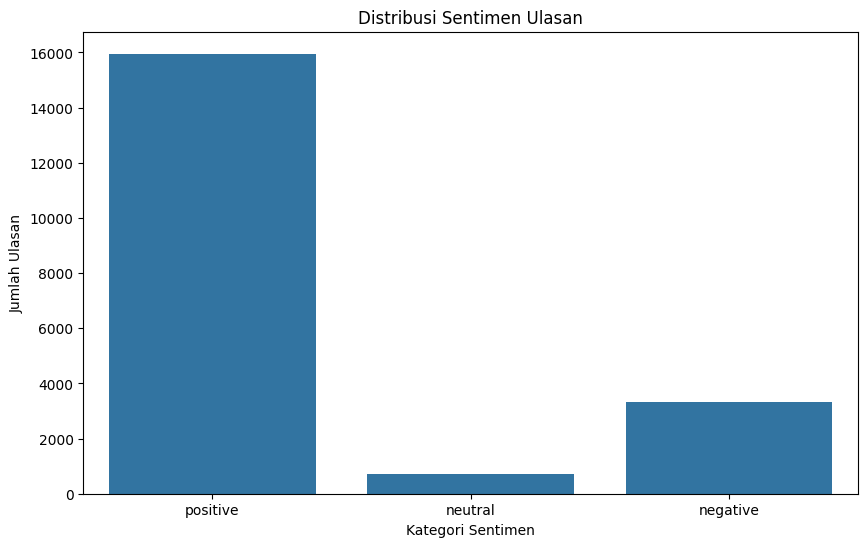


Statistik Deskriptif Skor Sentimen:
count    19982.000000
mean         8.189120
std          9.850355
min        -38.000000
25%          1.000000
50%          7.000000
75%         14.000000
max        106.000000
Name: polarity_score, dtype: float64

Contoh Ulasan Positif:
[list(['pinterest', 'sempurna', 'mencari', 'inspirasi', 'fashion', 'dekorasi', 'rumah', 'resep', 'makanan', 'antarmukanya', 'intuitif', 'mudah', 'penuh', 'ide', 'kreatif', 'fitur', 'penyimpanan', 'pin', 'membantu', 'mengorganisir', 'inspirasi', 'cocok', 'eksplorasi', 'tren', 'terbaru', 'merancang', 'proyek', 'impian', 'scrol', 'menemukan', 'menarik', 'bermanfat'])
 list(['first', 'want', 'say', 'ap', 'actualy', 'god', 'lengkap', 'nemu', 'referensi', 'update', 'apnya', 'lemot', 'banget', 'sinyal', 'kenceng', 'buka', 'gambar', 'diberanda', 'lemot', 'banget', 'search', 'kadang', 'eror', 'hope', 'developer', 'membenahi', 'jujur', 'mengangu', 'buru', 'buru', 'thank', 'providing', 'useful', 'ap', 'hope', 'performance', 'is

In [13]:
# Analisis sentimen dengan fungsi yang sudah diperbarui
results = clean_df['text_clean_filtered'].apply(sentiment_analysis_lexicon_indonesia)

# Unpack results lebih elegan
clean_df['polarity_score'] = [result[0] for result in results]
clean_df['polarity'] = [result[1] for result in results]

# Analisis distribusi yang lebih informatif
polarity_distribution = clean_df['polarity'].value_counts()

# Menambahkan persentase
polarity_percentage = clean_df['polarity'].value_counts(normalize=True) * 100

# Membuat DataFrame untuk tampilan lebih baik
dist_df = pd.DataFrame({
    'Count': polarity_distribution,
    'Percentage': polarity_percentage.round(2)
})

print("\nDistribusi Sentimen:")
print(dist_df)

plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='polarity', order=['positive', 'neutral', 'negative'])
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Analisis skor sentimen
print("\nStatistik Deskriptif Skor Sentimen:")
print(clean_df['polarity_score'].describe())

# Contoh beberapa ulasan dari setiap kategori
print("\nContoh Ulasan Positif:")
print(clean_df[clean_df['polarity'] == 'positive']['text_clean_filtered'].head(3).values)

print("\nContoh Ulasan Negatif:")
print(clean_df[clean_df['polarity'] == 'negative']['text_clean_filtered'].head(3).values)

print("\nContoh Ulasan Neutral:")
print(clean_df[clean_df['polarity'] == 'neutral']['text_clean_filtered'].head(3).values)


WORDCLOUD ULASAN POSITIF:


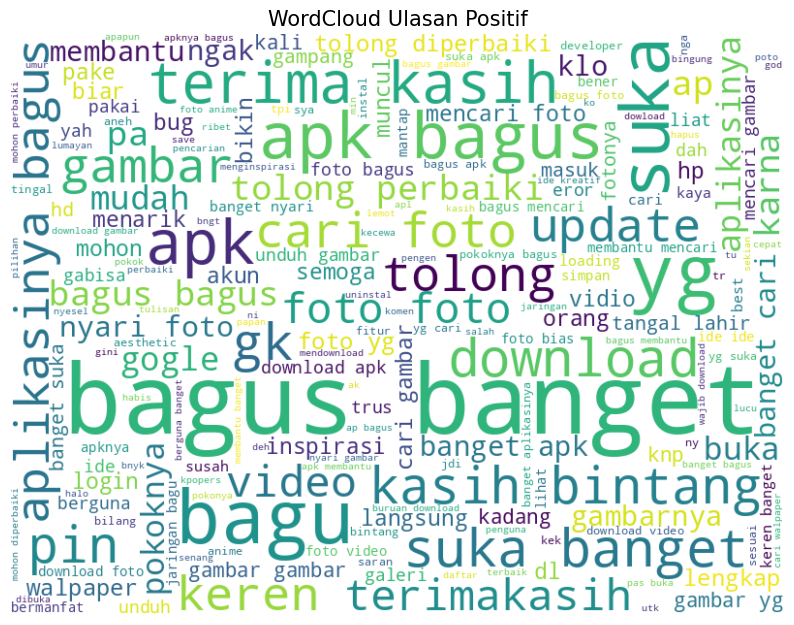


WORDCLOUD ULASAN NETRAL:


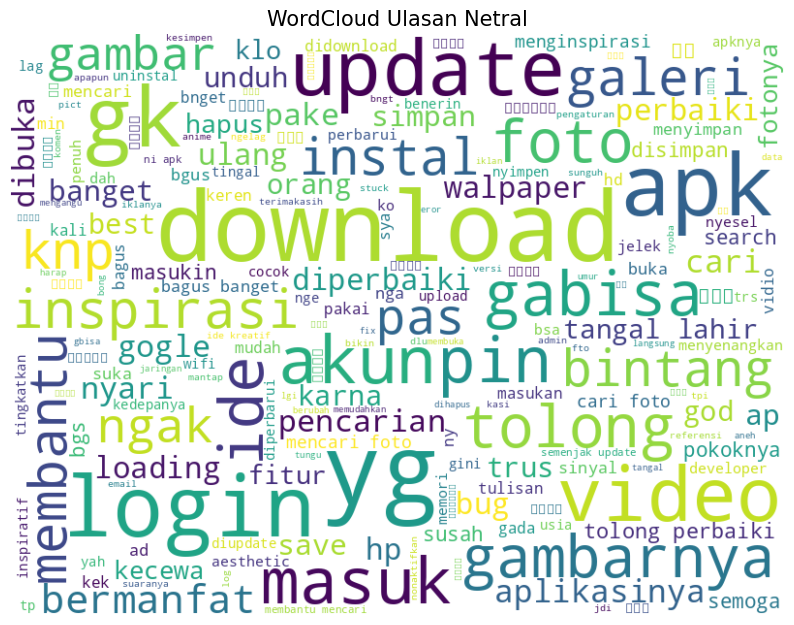


WORDCLOUD ULASAN NEGATIF:


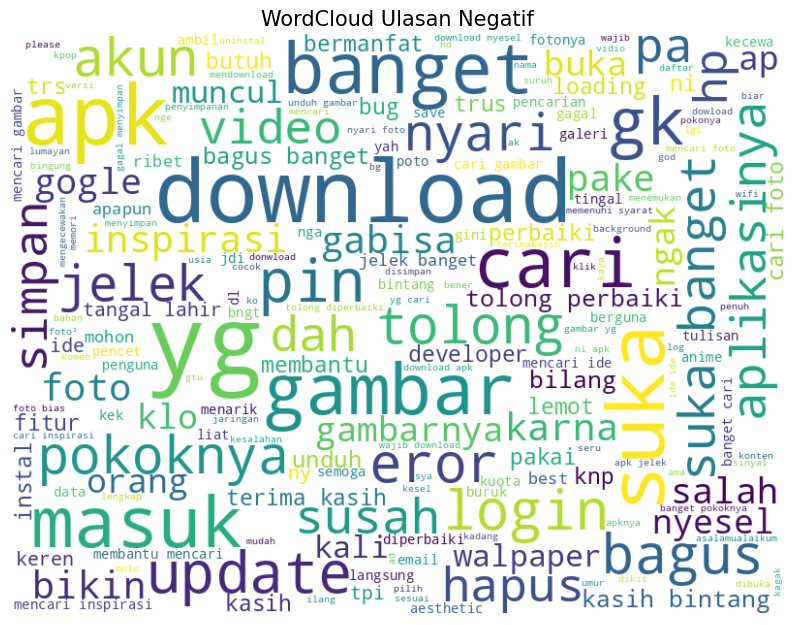


Mask Pinterest tidak ditemukan, menggunakan bentuk default


In [14]:
# Fungsi untuk membuat wordcloud dengan mask khusus
def create_wordcloud(text, title, mask=None):
    # Filter stopwords tambahan
    additional_stopwords = {'aplikasi', 'pinterest', 'app', 'gua', 'lu', 'nih', 'sih', 'ya', 'gak'}
    stopwords_id = set(stopwords.words('indonesian')) | additional_stopwords

    # Membuat wordcloud
    wc = WordCloud(
        width=800,
        height=600,
        background_color='white',
        stopwords=stopwords_id,
        mask=mask,
        max_words=200,
        max_font_size=100,
        colormap='viridis'
    ).generate(text)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud Ulasan {title}', size=15)
    plt.axis('off')
    plt.show()

# Membuat teks untuk masing-masing kategori
positive_text = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_clean_filtered'].apply(' '.join))
neutral_text = ' '.join(clean_df[clean_df['polarity'] == 'neutral']['text_clean_filtered'].apply(' '.join))
negative_text = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_clean_filtered'].apply(' '.join))

# Membuat wordcloud untuk masing-masing kategori
print("\nWORDCLOUD ULASAN POSITIF:")
create_wordcloud(positive_text, 'Positif')

print("\nWORDCLOUD ULASAN NETRAL:")
create_wordcloud(neutral_text, 'Netral')

print("\nWORDCLOUD ULASAN NEGATIF:")
create_wordcloud(negative_text, 'Negatif')

# Versi alternatif dengan mask Pinterest (opsional)
# Anda bisa menggunakan logo Pinterest sebagai mask
try:
    pinterest_mask = np.array(Image.open("pinterest-logo.png"))
    print("\nWORDCLOUD ULASAN POSITIF (DENGAN MASK PINTEREST):")
    create_wordcloud(positive_text, 'Positif', pinterest_mask)
except:
    print("\nMask Pinterest tidak ditemukan, menggunakan bentuk default")

In [15]:
X = clean_df['text_clean_filtered'].apply(' '.join) # Convert list of words to string
y = clean_df['polarity']

# Ekstraksi fitur menggunakan TF-IDF dengan pengaturan yang lebih efisien
tfidf_regresi = TfidfVectorizer()
X_tfidf = tfidf_regresi.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model Logistic Regression
logistic_regression = LogisticRegression(max_iter=500)  # atur max_iter untuk mempercepat
logistic_regression.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)


Logistic Regression - accuracy_train: 0.9460744447919925
Logistic Regression - accuracy_test: 0.8984238178633975


In [16]:
# 1. Persiapan Data
X = clean_df['text_clean_filtered'].apply(' '.join)  # Konversi list ke string
y = clean_df['polarity']

# 2. TF-IDF dengan Pengaturan Dasar tapi Optimal
tfidf = TfidfVectorizer(
    max_features=12321,
    ngram_range=(1, 2),        # Gunakan unigram + bigram
    stop_words='english'       # Hapus stopwords
)
X_tfidf = tfidf.fit_transform(X)

# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Pertahankan distribusi kelas
)

# 4. Model SVM dengan Parameter yang Lebih Baik
svm = SVC(
    kernel='linear',
    C=1.5,                     # Nilai C yang sedikit lebih besar
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)
svm.fit(X_train, y_train)

# 5. Evaluasi
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

Train Accuracy: 0.9733
Test Accuracy: 0.8974



In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Persiapan Data
X = clean_df['text_clean_filtered'].apply(' '.join)  # Konversi list ke string
y = clean_df['polarity']

# 2. Ekstraksi Fitur dengan Bag of Words (BoW)
bow_vectorizer = CountVectorizer(
    max_features=12321,   # Batasi jumlah fitur untuk efisiensi
    ngram_range=(1, 2),   # Unigram dan bigram
    stop_words='english'  # Hapus stopwords
)
X_bow = bow_vectorizer.fit_transform(X)

# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Pertahankan distribusi kelas
)

# 4. Model SVM dengan Parameter Optimal
svm = SVC(
    kernel='linear',
    C=1.5,                     # Nilai C untuk regularisasi
    class_weight='balanced',   # Tangani class imbalance
    random_state=42
)
svm.fit(X_train, y_train)

# 5. Evaluasi
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")


Train Accuracy: 0.9976
Test Accuracy: 0.9177



In [18]:
X = clean_df['text_clean_filtered'].apply(' '.join)
y = clean_df['polarity']

#  Count Vectorizer (Binary BoW)
vectorizer = CountVectorizer(
    binary=True,
    stop_words='english'
)
X_vec = vectorizer.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#  Logistic Regression
model = LogisticRegression(
    max_iter=1000,          # Pastikan konvergensi
    class_weight='balanced', # Handle class imbalance
    random_state=42
)
model.fit(X_train, y_train)

# Prediksi pada data uji untuk mendapatkan y_pred
y_pred = model.predict(X_test) # This line is added to define y_pred

# Evaluasi akurasi
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)

print("\nAccuracy train:", accuracy_train)
print("\nAccuracy test:", accuracy_test)


Accuracy train: 0.9532061307475759

Accuracy test: 0.8596447335501626


In [19]:
# Simpan vectorizer & model
joblib.dump(tfidf_regresi, 'tfidf_vectorizer.joblib')
joblib.dump(logistic_regression, 'logistic_model.joblib')
print("Model dan vectorizer berhasil disimpan!")


Model dan vectorizer berhasil disimpan!
